# Data Fitting
One of the most common data analysis problems and one you will frequently encounter in astronomy is fitting a curve to a set of data points. Suppose you have a set of $N$ data points $\{x_i, y_i\}$ and that you wish to fit the data to the function $$y(x) = a x + b,$$ where the $a$ and $b$ are adjustable parameters that give the "best fit." In this tutorial we will use Python to find the best fit parameters $a$ and $b$ and their associated uncertainties. You can read more about what constitues a "best fit" on the <a href="https://faculty1.coloradocollege.edu/~sburns/toolbox/DataFitting.html">Scientific Computing Toolbox website</a> or refer to one of the books [referenced below](#references). 

We will use some artificially generated data to illustrate the process. The table below shows the data we wish to fit. For this tutorial we will assume we don't have estimates of the uncertainties in either the $x$ or the $y$ data values. There is always some uncertainty in any measurement, but sometimes it's difficult to estimate. That's the case for these data. ([The Data Fitting with Uncertaineis tutorial](Simple-data-fitting-with-uncertainties.ipynb) explains how to fit data when uncertainties in the $y$ data values are known.) That data for this tutorial is in the a file called `FakeData.csv` in the `data` directory. 

  $x$  | $y$
 ---   | ---  
 8.213 | 3.107
 7.402 | 2.551
 6.876 | 2.200
 5.491 | 1.306
 5.196 | 1.110

The first step is to import the needed Python modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

The first two lines above are the familar commands for importing NumPy and the needed Matplotlib modules. The second line imports a single function `curve_fit()` from the `scipy.optimize` module. 

Next we have our program read the data from the `FakeData.csv` file.

In [2]:
xdata,ydata=np.loadtxt('data/FakeData.csv',unpack=True,delimiter=',')

This command reads the data from the file `FakeData.csv` and loads the first column in the file into the `xdata` array and the second column into `ydata`. The `unpack=True` argument is needed to load the columns properly. (See the [SciPy documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html) if you want to understand exactly what `unpack=True` argument does.) We use `delimiter=','` is a CSV (comma-separated values)file. 

Now we need to define the function we wish to fit. The `curvefit()` function will actually fit any arbitrary function. When we run `curve_fit()` we must pass it the name of a fitting function. We must write the code for that function ourselves. In this case we want to fit our data to a straight line. In Python we define functions with the `def` command followed by the name of the function and then the function's arguments. All *indented* lines after the definition line are included in the function. Below is the definition of our linear function. 

In [3]:
def linearFunc(x,intercept,slope):
    y = intercept + slope * x
    return y

The `return y` statement tells Python to return the value of `y` whenever the function is called. 

You can give your function any name you like. I called it `linearFunc`.

The next step is to actually do the fit using `curvefit()`. We must pass `curvefit()` the name of the function to fit, the horizontal axis data, and the vertical axis data. The program returns some arrays containing the best fit parameters and the [covariance matrix](https://en.wikipedia.org/wiki/Covariance_matrix). We will use the covariance matrix to determine the uncertainites in the slope and intercept of the best fit line.

In [4]:
a_fit,cov=curve_fit(linearFunc,xdata,ydata)

The next two lines assign the best-fit parameters returned by the `curve_fit()` to the variable `inter` and `slope`. 

In [5]:
inter = a_fit[0]
slope = a_fit[1]

Next, the uncertainties in the intercept and slope are computed from the covarience matrix and assigned to the variables `d_inter` and `d_slope`.

In [6]:
d_inter = np.sqrt(cov[0][0])
d_slope = np.sqrt(cov[1][1])

The following code is used to plot the data and the fit.

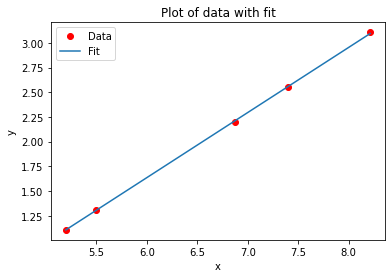

In [7]:
# Create a graph showing the data.
plt.plot(xdata,ydata,'ro',label='Data')

# Compute a best fit y values from the fit intercept and slope.
yfit = inter + slope*xdata

# Create a graph of the fit to the data.
plt.plot(xdata,yfit,label='Fit')

# Display a legend, label the x and y axes and title the graph.
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of data with fit')

# Save the figure to a file
plt.savefig('FakeData_example.png',dpi=300)

# Show the graph in a new window on the users screen.
plt.show()

We will use a the `print()` command to print the best fit parameters and uncertainties. Here we use [Python f-strings](https://realpython.com/python-f-strings/) to present the result. F-strings are prefixed with an `f`  and allow us to include variable names enclosed in `{}`. When the string is printed the values for the variables are substituted into the string. An example makes this clearer.  

In [8]:
# Display the best fit values for the slope and intercept. These print
# statments illustrate how to print a mix of strings and variables.
print(f'The slope = {slope}, with uncertainty {d_slope}')
print(f'The intercept = {inter}, with uncertainty {d_inter}')

The slope = 0.6587176810599606, with uncertainty 0.004847097046293069
The intercept = -2.3161870444414747, with uncertainty 0.03263589309955414


By default, f-strings usually present the results with more precision than we need, but it's easy to round the numbers to the desired precision. You can learn more about controling the display precision on the [Python Documentation website.](https://docs.python.org/3/reference/lexical_analysis.html#formatted-string-literals) 

## Summary

The code above is all you should need to do a simple linear fit to some data. When you're confronted with a new data analysis problem that requires a fit, it is usually faster to modify existing code than to reinvent it every time. I've included the Python script `linearfit.py` in the `code` directory. Feel free to modify that program and use it to write your own fitting programs.

A table with a short description of the Python functions used in this tutorial is posted on the [Scientific Computing Toolbox: Command Summary Page](https://faculty1.coloradocollege.edu/%7Esburns/toolbox/CommandSummary.html). 


<hr>
<a name="references"><b>References</b></a>

1. Bevington and Robinson, *Data Reduction and Error Analysis for the Physical Sciences 3rd Edition* (McGraw-Hill Education, 2002)  
2. Taylor, *An Introduction to Error Analysis: The Study of Uncertainties in Physical Measurements 2nd Edition*, (University Science Books, 1996)